# Project for People's Daile - Part #[4]
## Topic Modeling

In [1]:
import os

import gensim 
import pyLDAvis.gensim

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import matplotlib.cm 

import warnings
warnings.filterwarnings("ignore")

In [2]:
# Read in the corpus
rmrb_dict = {}
for file in os.listdir("../data/corpus_by_year/"):
    year = int(file[:4])
    text = []
    path = "../data/corpus_by_year/" + file
    with open(path) as f:
        for line in f:
            text += line.split()
    rmrb_dict[year] = text

In [3]:
rmrb = pd.DataFrame.from_dict({"year": rmrb_dict.keys(), "tokens": rmrb_dict.values()}, orient="index").T
rmrb.head()

,year,tokens
0,2002,"[本报, 北京, 2001, 12, 31, 日讯, 知识性, 可读性, 欣赏性, 一体, ..."
1,2001,"[加大, 治本, 力度, 狠抓, 工作, 落实, 取得, 反腐败, 斗争, 成效, 尉健行,..."
2,2000,"[当今, 新年, 钟声, 敲响, 中国, 人民, 全世界, 人民, 怀着, 无比, 兴奋, ..."
3,1971,"[今年, 我国, 人民, 无产阶级, 专政, 继续, 革命, 重要, 一年, 实行, 发展,..."
4,1965,"[坚决, 破除迷信, 改进, 原有, 设计, 洛阳, 轴承厂, 严格, 科学, 精神, 指导..."


### Topic Modelling with Gensim

In [4]:
# Construct the rmrb dictionary
dictionary = gensim.corpora.Dictionary(rmrb["tokens"])

In [5]:
# Create a list of tuples that contains each token and its count
corpus = [dictionary.doc2bow(text) for text in rmrb["tokens"]]

In [6]:
# Serialize the corpus
gensim.corpora.MmCorpus.serialize("../models/LDA/rmrb.mm", corpus)
rmrb_mm = gensim.corpora.MmCorpus("../models/LDA/rmrb.mm")

In [7]:
# Use the formateed corpus for topic modelling and induction
rmrb_lda = gensim.models.ldamodel.LdaModel(corpus=rmrb_mm, id2word=dictionary, 
                                           num_topics=10, 
                                           random_state=18,
                                           alpha="auto", eta="auto")

In [8]:
rmrb_lda.show_topics(num_words=200)

[(0,
  '0.010*"我们" + 0.009*"发展" + 0.007*"建设" + 0.006*"经济" + 0.006*"社会主义" + 0.006*"工作" + 0.006*"问题" + 0.005*"人民" + 0.004*"国家" + 0.004*"一个" + 0.004*"企业" + 0.004*"中国" + 0.004*"社会" + 0.003*"进行" + 0.003*"他们" + 0.003*"群众" + 0.003*"我国" + 0.003*"提高" + 0.002*"这个" + 0.002*"生产" + 0.002*"改革" + 0.002*"必须" + 0.002*"方面" + 0.002*"没有" + 0.002*"可以" + 0.002*"组织" + 0.002*"不能" + 0.002*"领导" + 0.002*"生活" + 0.002*"思想" + 0.002*"革命" + 0.002*"实现" + 0.002*"同志" + 0.002*"世界" + 0.002*"全国" + 0.002*"毛主席" + 0.002*"斗争" + 0.002*"教育" + 0.002*"加强" + 0.002*"历史" + 0.002*"进一步" + 0.002*"政策" + 0.002*"就是" + 0.002*"农村" + 0.002*"自己" + 0.002*"制度" + 0.002*"建立" + 0.002*"政治" + 0.002*"实行" + 0.002*"重要" + 0.002*"这些" + 0.002*"国际" + 0.002*"解决" + 0.002*"农业" + 0.002*"基础" + 0.002*"市场" + 0.002*"关系" + 0.002*"情况" + 0.002*"文化" + 0.002*"主要" + 0.002*"坚持" + 0.002*"要求" + 0.002*"无产阶级" + 0.002*"一些" + 0.002*"已经" + 0.002*"干部" + 0.002*"管理" + 0.002*"积极" + 0.002*"这种" + 0.002*"学习" + 0.001*"起来" + 0.001*"基本" + 0.001*"计划" + 0.001*"民族" + 0.001*"条件" + 0.001*"指出" 

In [9]:
# Inspect which topic the model predicts and load into DataFrame
lda_df = pd.DataFrame({
    "year": rmrb["year"], 
    "topics": [rmrb_lda[dictionary.doc2bow(l)] for l in rmrb["tokens"]]
})
lda_df.sort_values(by="year")

,year,topics
4,1965,"[(1, 0.021332322), (2, 0.29011288), (3, 0.1372..."
7,1966,"[(1, 0.03018401), (2, 0.4303343), (3, 0.119190..."
10,1967,"[(2, 0.45813474), (3, 0.19375394), (4, 0.01436..."
35,1968,"[(1, 0.022677667), (2, 0.40290326), (3, 0.0977..."
34,1969,"[(1, 0.01311481), (2, 0.56868094), (3, 0.11052..."
5,1970,"[(1, 0.024008555), (2, 0.31018665), (3, 0.1231..."
3,1971,"[(1, 0.020210166), (2, 0.4126779), (3, 0.05972..."
8,1972,"[(1, 0.019355396), (2, 0.49916112), (3, 0.0869..."
9,1973,"[(1, 0.012788763), (2, 0.47655258), (3, 0.0704..."
16,1974,"[(2, 0.49609214), (3, 0.07803731), (4, 0.22298..."


In [10]:
# Show the table that makes each topic its own column

# Dictionary that temporarily holds the probability
topicsProbDict = {i: [0] * len(lda_df) for i in range(rmrb_lda.num_topics)}

# Load them into the dictionary
for index, topicTuples in enumerate(lda_df["topics"]):
    for topicNum, prob in topicTuples:
        topicsProbDict[topicNum][index] = prob
    
# Update the DataFrame
for topicNum in range(rmrb_lda.num_topics):
    lda_df["topic{}".format(topicNum)] = topicsProbDict[topicNum]

lda_df = lda_df.sort_values(by="year")

In [11]:
# Visualize the topics in the corpus
ldaDFV = lda_df[["topic%d" % x for x in range(rmrb_lda.num_topics)]]
ldaDFVisN = lda_df[["year"]]
ldaDFVis = ldaDFV.values
ldaDFVisNames = ldaDFVisN.values
ldaDFV

,topic0,topic1,topic2,topic3,topic4,topic5,topic6,topic7,topic8,topic9
4,0.000000,0.021332,0.290113,0.137283,0.081091,0.222794,0.000000,0.042473,0.179765,0.000000
7,0.000000,0.030184,0.430334,0.119191,0.046424,0.166072,0.000000,0.032397,0.164943,0.000000
10,0.000000,0.000000,0.458135,0.193754,0.014366,0.118954,0.000000,0.040709,0.163062,0.000000
35,0.000000,0.022678,0.402903,0.097750,0.018731,0.179439,0.000000,0.035603,0.238802,0.000000
34,0.000000,0.013115,0.568681,0.110524,0.032082,0.120718,0.000000,0.038289,0.109049,0.000000
5,0.000000,0.024009,0.310187,0.123133,0.085962,0.103170,0.000000,0.055809,0.275367,0.010541
3,0.000000,0.020210,0.412678,0.059728,0.109386,0.108609,0.013021,0.058754,0.201573,0.000000
8,0.000000,0.019355,0.499161,0.086994,0.094492,0.102667,0.013456,0.059447,0.101070,0.016469
9,0.000000,0.012789,0.476553,0.070437,0.083877,0.123825,0.015709,0.031062,0.162055,0.018984
16,0.000000,0.000000,0.496092,0.078037,0.222986,0.084119,0.000000,0.000000,0.088720,0.014033


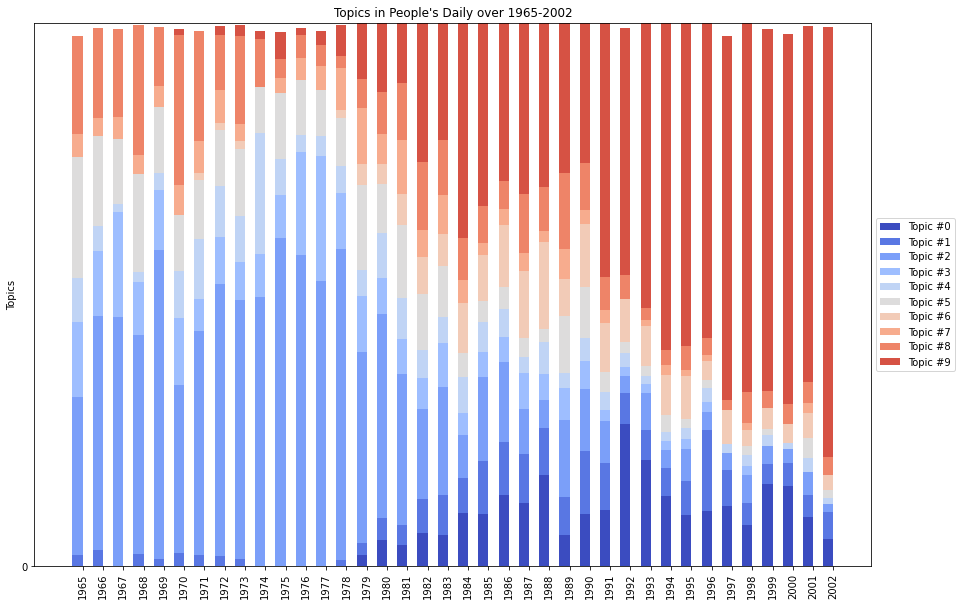

In [12]:
# Visualization as a stacked bar chart
N = 38
ind = np.arange(N)  # The x-axis locations for the novels
K = rmrb_lda.num_topics  # N documents, K topics
width = 0.5  # The width of the bars
plots = []
height_cumulative = np.zeros(N)

plt.figure(figsize=(15, 10))

for k in range(K):
    color = plt.cm.coolwarm(k / K, 1)
    if k == 0:
        p = plt.bar(ind, ldaDFVis[:, k], width, color=color)
    else:
        p = plt.bar(ind, ldaDFVis[:, k], width, bottom=height_cumulative, color=color)
    height_cumulative += ldaDFVis[:, k]
    plots.append(p)

plt.ylim((0, 1)) # Proporations sum to one, so the height of the stacked bars is one
plt.ylabel("Topics")

plt.title("Topics in People's Daily over 1965-2002")
plt.xticks(ind + width / 2, [yr[0] for yr in ldaDFVisNames], rotation="vertical")
plt.yticks(np.arange(0, 1, 10))
topic_labels = ["Topic #{}".format(k) for k in range(K)]
plt.legend([p[0] for p in plots], topic_labels, loc="center left", frameon=True, bbox_to_anchor=(1, 0.5))

path = f"../pictures/lda_barplot.png"
plt.savefig(path, format="png")

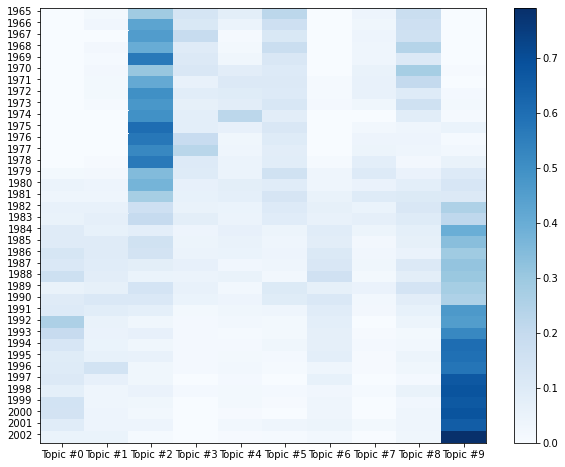

In [13]:
# Visualize as a heatmap
plt.figure(figsize=(10, 8))
plt.pcolor(ldaDFVis, norm=None, cmap="Blues")
plt.yticks(np.arange(ldaDFVis.shape[0]) + 0.5, ldaDFVisNames)
plt.xticks(np.arange(rmrb_lda.num_topics) + 0.5, topic_labels)

# Flip the y-axis so the texts are in the order we anticipate
plt.gca().invert_yaxis()

# Rotate the ticks on the x-axis
plt.xticks()
plt.yticks(ind + width / 2, [yr[0] for yr in ldaDFVisNames], rotation="horizontal")
plt.colorbar(cmap="Blues")

path = f"../pictures/lda_heatmap.png"
plt.savefig(path, format="png")

### Topic Modelling Dynamic Visualization

In [14]:
rmrb_dictionary = gensim.corpora.Dictionary(rmrb["tokens"])
rmrb_corpus = [dictionary.doc2bow(text) for text in rmrb["tokens"]]
rmrb_lda = gensim.models.ldamodel.LdaModel(corpus=rmrb_mm, id2word=dictionary, num_topics=10, alpha="auto", eta="auto")
vis = pyLDAvis.gensim.prepare(rmrb_lda, rmrb_corpus, rmrb_dictionary)
pyLDAvis.save_html(vis, "../pictures/rmrb_lda.html")